# FIONA  https://pypi.org/project/Fiona/

In [2]:
import os
import fiona
import numpy as np
import pprint
import geopandas
from matplotlib import pyplot
from descartes import PolygonPatch

odczyt danych

In [3]:
path="A:\cloud\SynologyDrive\Drive\zut_dropbox\dydaktyka\gis_informatyka\cwiczenie10" 
file="dzielnice_shp.shp"
dzielnice=os.path.join(path,file)
plik=fiona.open(dzielnice)

DriverError: A:\cloud\SynologyDrive\Drive\zut_dropbox\dydaktyka\gis_informatyka\cwiczenie10\dzielnice_shp.shp: No such file or directory

wyświetlanie typu danych


In [50]:
print (plik.driver)

ESRI Shapefile


wyświetlanie układu współrzędnych

In [55]:
print(plik.crs)

{'proj': 'tmerc', 'lat_0': 0, 'lon_0': 19, 'k': 0.9993, 'x_0': 500000, 'y_0': -5300000, 'ellps': 'GRS80', 'units': 'm', 'no_defs': True}


wyświetlanie liczby rekordów

In [56]:
print (len(plik))

39


wyświetlanie "bbox" w układzie wspolrzednych

In [57]:
print (plik.bounds)

(197727.90466749883, 614892.172312839, 220757.6739479123, 639432.1897859434)


wyświetlanie struktury danych

In [58]:
pprint.pprint(plik.schema)

{'geometry': 'Polygon',
 'properties': OrderedDict([('fid', 'float:20'),
                            ('id', 'float:20'),
                            ('nazwa', 'str:80'),
                            ('liczba_mie', 'float:24.15'),
                            ('area', 'float:24.15')])}


odczyt danych (Osów)

In [60]:
pprint.pprint(plik[2])

{'geometry': {'coordinates': [[(203953.7177571059, 634979.5079797497),
                               (204199.95544869883, 635087.4436010439),
                               (204255.27295367507, 635176.6476983959),
                               (204306.6081638508, 635253.3300249139),
                               (204402.6846358464, 635147.5733076213),
                               (204419.868625784, 634856.2190388357),
                               (204543.66274168558, 634669.2043195777),
                               (204405.09992103098, 634655.1341976235),
                               (204431.02114196058, 634522.6260060333),
                               (204556.96417580306, 634547.198776912),
                               (204857.514937767, 634592.6599335195),
                               (204945.22461271298, 634627.0057926234),
                               (205125.25835128437, 634678.3414690793),
                               (205192.38943801442, 634566.0271230377),


Wyświetlenie mapy

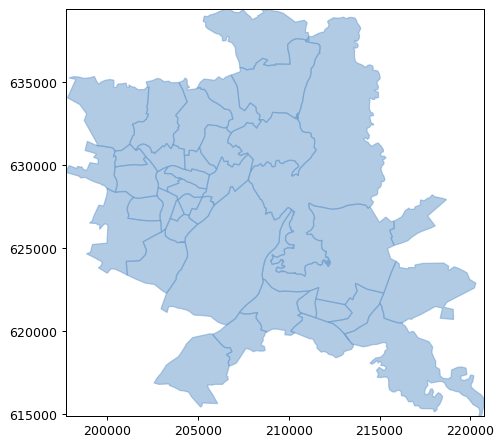

In [61]:
BLUE = '#6699cc'
fig = pyplot.figure(1, figsize=(6, 6), dpi=90)
ax = fig.add_subplot(111)

with fiona.Env():

    with fiona.open(dzielnice, 'r') as input:
        for f in input:
            ax.add_patch(
                PolygonPatch(
                    f['geometry'], fc=BLUE, ec=BLUE, alpha=0.5, zorder=2 ))

a=np.array(plik.bounds)
ax.set_xlim(a[0], a[2])
ax.set_ylim(a[1], a[3])

fig.savefig('dzielnice.png')

# GEOPY https://pypi.org/project/geopy/

In [63]:
from geopy.geocoders import Nominatim

definicja narzędzia geokodującego:

In [64]:
geolocator = Nominatim(user_agent="sip")

adres

In [69]:
adres = geolocator.geocode("Dąbie, województwo zachodniopomorskie, Polska")
print(adres.address)
print((adres.latitude, adres.longitude))

Dąbie, Prawobrzeże, Szczecin, województwo zachodniopomorskie, Szczecin
(53.4796587, 14.666281028485011)


ReverseGeocoding

In [71]:
adres = geolocator.reverse("53.44862355, 14.491136749999999")
print(adres.address)

Zachodniopomorski Uniwersytet Technologiczny - Wydział Informatyki 2, 52, Żołnierska, Apartamenty Pogodno, Pogodno, Zachód, Szczecin, województwo zachodniopomorskie, 71-250, Polska


In [73]:
from geopy import distance
A = (53.44862355, 14.4911367)
B = (52.4235, 14.5351)
print('Z Rektoratu do WI2 na Żołnierskiej jest', round(distance.distance(A, B).kilometers,2),' km')

Z Rektoratu do WI2 na Żołnierskiej jest 114.12  km


# Folium

In [74]:
import folium
m = folium.Map(location=[53.4327,14.5483])

In [75]:
m

In [85]:
folium.Map(
    location=[53.4327,14.5483],
    tiles='OpenStreetMap',
    zoom_start=5,
    control_scale=True,
    crs='EPSG3857'
)

parametr tiles to mapa podkładowa. Przykładowe kombinacje: OpenStreetMap, but Stamen Terrain, Stamen Toner, Mapbox Bright, and Mapbox Control Room

In [89]:
import folium
from folium import plugins
m = folium.Map(location=[53.4327,14.5483])

folium.Map(
    location=[53.4327,14.5483],
    tiles='OpenStreetMap',
    zoom_start=5,
    control_scale=True,
    crs='EPSG3857'
)
N = 200
data = np.array(
    [
        np.random.uniform(low=53, high=53.5, size=N),
        np.random.uniform(low=14, high=15, size=N)
    ]
).T

plugins.MarkerCluster(data).add_to(m)
m.save(os.path.join(path,'html/dzielnice.html'))
m

In [90]:
import folium
from folium import plugins
m = folium.Map(location=[53.4327,14.5483])

folium.Map(
    location=[53.4327,14.5483],
    tiles='OpenStreetMap',
    zoom_start=5
)
N = 100
data = np.array(
    [
        np.random.uniform(low=53, high=53.5, size=N),
        np.random.uniform(low=14, high=15, size=N)
    ]
).T
#print(data)
#inne ikony
for x in data:
    ikona = plugins.BeautifyIcon(
    icon='plane',
    border_color='#b3334f',
    text_color='#b3334f',
    icon_shape='circle')
    folium.Marker(
        location=x,
        popup='Lotnisko',
        icon=ikona
    ).add_to(m)
m.save(os.path.join(path,'html/dzielnice.html'))
m

In [92]:
import os
import folium
import geopandas
import json

gdf = geopandas.read_file(dzielnice)

m = folium.Map(
    location=[53.4327,14.5483],
    tiles='OpenStreetMap',
    zoom_start=12
    )
folium.GeoJson(
    gdf,
    ).add_to(m)


m.save(os.path.join(path,'html/dzielnice.html'))
m

# Typy danych

In [33]:
gdf = geopandas.read_file(dzielnice)
print(gdf[:5])

   fid    id              nazwa  liczba_mie     area  \
0  1.0   7.0  Głębokie-Pilchowo      1231.0  1262.31   
1  2.0  19.0               Osów      3474.0   822.03   
2  3.0  31.0           Warszewo      7795.0   728.04   
3  4.0   2.0             Bukowo      3783.0   486.66   
4  5.0  24.0            Skolwin      3214.0  1264.80   

                                            geometry  
0  POLYGON ((202230.003 634734.076, 202302.096 63...  
1  POLYGON ((202230.003 634734.076, 202153.217 63...  
2  POLYGON ((203953.718 634979.508, 204199.955 63...  
3  POLYGON ((204952.003 634628.938, 205101.789 63...  
4  POLYGON ((207316.916 635859.724, 207314.810 63...  


In [94]:
gjson=gdf.to_json()
pprint.pprint(gjson)

('{"type": "FeatureCollection", "features": [{"id": "0", "type": "Feature", '
 '"properties": {"area": 1262.31, "fid": 1.0, "id": 7.0, "liczba_mie": 1231.0, '
 '"nazwa": "G\\u0142\\u0119bokie-Pilchowo"}, "geometry": {"type": "Polygon", '
 '"coordinates": [[[202230.00302957918, 634734.0756825311], '
 '[202302.09619035624, 634684.9667401845], [202278.1255949082, '
 '634305.1746082613], [202258.80537886347, 633999.0512727862], '
 '[202228.4763488188, 633699.2949230382], [202202.48143122572, '
 '633558.6314817108], [202207.04915556393, 633450.1892703595], '
 '[202230.45667448844, 633369.0181690389], [202219.40620720078, '
 '633284.3277174719], [202179.57951128104, 633195.7590803979], '
 '[202151.47681946686, 633112.1417101277], [202207.24074267683, '
 '633091.5440844875], [202265.15155014308, 633104.9684189418], '
 '[202271.1530813825, 633019.1974097537], [202225.64170393092, '
 '632930.9819225986], [202179.41308551427, 632831.4240185851], '
 '[202169.077071102, 632758.0651842486], [202128

In [97]:
center=gdf.centroid
print(center[:5])

0    POINT (200191.137 633324.418)
1    POINT (202911.414 632973.791)
2    POINT (204994.112 632810.259)
3    POINT (206790.004 633808.604)
4    POINT (208302.103 637813.995)
dtype: geometry


pobieranie danych (dataframe)

In [98]:
import os
import pyproj
import folium
import geopandas
import json
from folium import plugins


df = geopandas.read_file(dzielnice) #geodataframe

#pobieranie metadanych
gdf=geopandas.GeoDataFrame(df) #geodataFrame używamy kiedy mamy tabelę ze współrzędnymi x i y
nazwa = gdf['nazwa'] #data
print(nazwa)
print(df)
print (gdf)



0                Głębokie-Pilchowo
1                             Osów
2                         Warszewo
3                           Bukowo
4                          Skolwin
5                       Niebuszewo
6                        Żelechowa
7                 Drzetowo-Grabowo
8             Arkońskie-Niemierzyn
9            Zawadzkiego-Klonowica
10                         Pogodno
11                           Łękno
12              Niebuszewo-Bolinko
13              Śródmieście-Północ
14                          Turzyn
15              Śródmieście-Zachód
16                         Centrum
17                     Nowe Miasto
18                    Stare Miasto
19                      Świerczewo
20              Krzekowo-Bezrzecze
21                        Gumieńce
22                       Pomorzany
23                           Załom
24         Międzyodrze-Wyspa Pucka
25                        Stołczyn
26                 Golęcino-Gocław
27            Wielgowo Sławociesze
28    Płonia-Smierdn

Dynamicznie pobieranie danych  i wizualizacja na mapie (popup)

In [100]:
import os
import folium
import geopandas
import json

gdf = geopandas.read_file(dzielnice,encoding='utf-8').to_crs('epsg:4326')

m = folium.Map(
    location=[53.4327,14.5483],
    tiles='OpenStreetMap',
    zoom_start=12
    )
folium.GeoJson(
    gdf,
    ).add_to(m)
def getXY(pt):
    return (pt.x, pt.y)

centroidseries = gdf['geometry'].centroid
x,y = [list(t) for t in zip(*map(getXY, centroidseries))]

for a in range(centroidseries.count()):
    name=str(nazwa[a])
    folium.Marker(
    location=[y[a],x[a]],
    popup=name,
    icon=folium.Icon(color='green', icon='ok-sign'),
).add_to(m)

folium.LayerControl().add_to(m)
minimap = plugins.MiniMap()
m.add_child(minimap)    
    
m.save(os.path.join(path,'html/dzielnice.html'))
m

C:\Users\alysk\Anaconda3\envs\geopandas\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.



In [101]:
import os
import folium
import geopandas as gpd
import pandas as pd
import json


gdf = geopandas.read_file(dzielnice)
df=gpd.GeoDataFrame(gdf)
#df=pd.DataFrame(gdf)

#nazwa = gdf['nazwa']
#print(df)
m = folium.Map(
    location=[53.4327,14.5483],
    tiles='OpenStreetMap',
    zoom_start=11,
    control_scale=True
    )

folium.Choropleth(
    geo_data=gdf,
    name='liczba mieszkańców',
    data=gdf,
    columns=['id', 'liczba_mie'],
    key_on='feature.properties.id',
    fill_color='PuRd',
    fill_opacity=0.7,
    line_opacity=0.1,
    legend_name='Liczba mieszkańców',
    highlight=True,
).add_to(m)    
    
#gjson.add_to(m) #2 warstwa
folium.LayerControl().add_to(m)
folium.Popup('outline Popup on GeoJSON').add_to(m)
plugins.MiniMap().add_to(m)
m.save(os.path.join(path,'html/dzielnice.html'))
m

Palety kolorów: BuGn, BuPu, GnBu, OrRd, PuBu, PuBuGn, PuRd, RdPu, YlGn, YlGnBu, YlOrBr, YlOrRd

In [1]:
import os
import folium
import geopandas as gpd
import pandas as pd
import json
from folium.features import GeoJson, GeoJsonTooltip



gdf = geopandas.read_file(dzielnice)
df=gpd.GeoDataFrame(gdf)


m = folium.Map(
    location=[53.4327,14.5483],
    tiles='OpenStreetMap',
    zoom_start=11,
    control_scale=True
    )


bins = list(df['liczba_mie'].quantile([0, 0.25, 0.5, 0.75, 1]))
print(bins)
folium.Choropleth(
    geo_data=gdf,
    name='liczba mieszkańców',
    data=gdf,
    columns=['id', 'liczba_mie'],
    key_on='feature.properties.id',
    fill_color='PuRd',
    fill_opacity=0.7,
    line_opacity=0.1,
    legend_name='Liczba mieszkańców',
    bins=bins,
    reset=True,
    highlight=True,
 ).add_to(m)    

folium.GeoJson(data=gdf,
               name='liczba mieszkańców',smooth_factor=2,
               style_function=lambda x: {'color':'black','fillColor':'transparent','weight':2},
                tooltip=folium.GeoJsonTooltip(fields=['liczba_mie'],
                                              labels=False,
                                              sticky=False),
               highlight_function=lambda x: {'weight':3,'fillColor':'grey'}
              ).add_to(m)


#gjson.add_to(m) #2 warstwa
folium.LayerControl().add_to(m)
folium.Popup('outline Popup on GeoJSON').add_to(m)
plugins.MiniMap().add_to(m)
m.save(os.path.join(path,'html/dzielnice.html'))
m

NameError: name 'geopandas' is not defined

# Wtyczki dla folium

In [103]:
import os
import folium
import geopandas
import pandas as pd
import json
from pyproj import CRS
from folium import plugins
from folium.features import GeoJson, GeoJsonTooltip
from folium.plugins import Draw, MeasureControl


m = folium.Map(
    location=[53.4327,14.5483],
    tiles='OpenStreetMap',
    zoom_start=12,
    control_scale=True,
    crs='EPSG3857'
    )
Draw(
    export=True,
    filename=dzielnice,
    position='topleft',
    draw_options={'polyline': {'allowIntersection': False}},
    edit_options={'poly': {'allowIntersection': False}}
).add_to(m)

MeasureControl(
    position='topright', 
    primary_length_unit='meters', 
    secondary_length_unit='kilometers', 
    primary_area_unit='sqmeters', 
    secondary_area_unit='hectares',
    color_options='red',
).add_to(m)

gdf = geopandas.read_file(dzielnice).to_crs('epsg:4326')
folium.GeoJson(
    gdf,name='dzielnice',
    ).add_to(m)

folium.LayerControl().add_to(m)
plugins.MiniMap().add_to(m)
m.save(os.path.join(path,'html/dzielnice.html'))
m


# Zadanie
Na podstawie powyższyh informacji, stwórz mapę pandemii koronawirusa na świecie.
Dane:
A)
country.gejson - mapa świata
gdzie: GMI_CNTRY = kod kraju

B) ovid-covid-data.csv
iso-code = kod kraju

Podstawowa funkcjonalność mapy:
mapa tematyczna z wizualizacją skali kolorów (metoda bins)
kontrola warstw
skala
legenda

Ocena dostateczna:
mapa tematyczna w palikacji folium różnicująca kolorem dane z ostatniego dnia pandemii dla  danego kraju (data w pliku covid...).
Proszę wykorzystać funkcję quantile do wyświetlenia danych.

Ocena dobra:
wykonanie mapy dynamicznej z wykorzystaniem funkcji:
TimestampedGeoJson
Mapa powinna wyświetlać dane w odstępach dziennych od pierwszego notowania do dnia 04.11.2020


Ocena dobra:
Proszę zbudować reverse geokoder, który na podstawie współrzędnych geograficznych (plik points.csv) uzupełni plik tekstowy csv nazwą, kraju, woejwództwem, powiatem, gminą lub miastem lub regionem geograficznym. Dane należy przedstawić na mapie folium jako punkty. Po wskazaniu na punkt ma pojawić się "wyskakujące okienko" z zgeokodowanymi informacjami administracyjnymi.

